In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('chicago data summary Interpolated.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,153.995417,5.93,40731.0,9362.0800,6.2,471401.4910,1195.605,43.50%,177440.0000,1.70%,4629,1.68,175.2
1,4/1/2005,154.603930,5.86,41006.9,9365.7575,6.1,473749.3002,1195.605,43.50%,177931.6667,1.67%,4585,2.00,177.3
2,5/1/2005,155.274942,5.72,41282.8,9369.4350,6.0,476097.1094,1195.605,43.50%,178423.3333,1.63%,4618,1.43,176.9
3,6/1/2005,156.073060,5.58,41558.7,9373.1125,6.4,478444.9186,1195.605,43.50%,178915.0000,1.60%,4476,1.44,177.0
4,7/1/2005,156.617382,5.70,41834.6,9376.7900,6.0,480792.7278,1195.605,43.47%,179127.6667,1.60%,4920,2.00,177.3
5,8/1/2005,156.555215,5.82,42110.5,9380.4675,5.5,483140.5370,1195.605,43.43%,179340.3333,1.60%,5641,1.80,179.0
6,9/1/2005,157.966468,5.77,42386.4,9384.1450,5.5,485488.3462,1195.605,43.40%,179553.0000,1.60%,4897,1.71,183.0
7,10/1/2005,159.153794,6.07,42662.3,9387.8225,5.1,487836.1554,1195.605,43.30%,180335.6667,1.60%,4657,1.75,182.9
8,11/1/2005,161.324973,6.33,42938.2,9391.5000,5.2,490183.9646,1195.605,43.20%,181118.3333,1.60%,4448,1.85,181.7
9,12/1/2005,162.646391,6.27,43214.1,9395.1775,5.1,492531.7738,1195.605,43.10%,181901.0000,1.60%,3988,2.01,180.1


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,153.995417,5.93,40731.0,9362.0800,6.2,471401.4910,1195.605,177440.0000,4629,1.68,175.2,43.50,1.70
1,4/1/2005,154.603930,5.86,41006.9,9365.7575,6.1,473749.3002,1195.605,177931.6667,4585,2.00,177.3,43.50,1.67
2,5/1/2005,155.274942,5.72,41282.8,9369.4350,6.0,476097.1094,1195.605,178423.3333,4618,1.43,176.9,43.50,1.63
3,6/1/2005,156.073060,5.58,41558.7,9373.1125,6.4,478444.9186,1195.605,178915.0000,4476,1.44,177.0,43.50,1.60
4,7/1/2005,156.617382,5.70,41834.6,9376.7900,6.0,480792.7278,1195.605,179127.6667,4920,2.00,177.3,43.47,1.60


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,40731.00000,9362.08000,6.2,471401.4910,1195.605000,177440.0000,4629,1.68,175.200,43.50,1.70
1,5.86,41006.90000,9365.75750,6.1,473749.3002,1195.605000,177931.6667,4585,2.00,177.300,43.50,1.67
2,5.72,41282.80000,9369.43500,6.0,476097.1094,1195.605000,178423.3333,4618,1.43,176.900,43.50,1.63
3,5.58,41558.70000,9373.11250,6.4,478444.9186,1195.605000,178915.0000,4476,1.44,177.000,43.50,1.60
4,5.70,41834.60000,9376.79000,6.0,480792.7278,1195.605000,179127.6667,4920,2.00,177.300,43.47,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...
149,3.88,60262.41667,9496.63925,5.3,677682.0074,1101.066667,164783.3333,1785,1.56,211.010,35.97,1.80
150,3.81,60538.33333,9494.14300,4.6,680403.2893,1100.515000,164838.0000,1810,1.79,211.699,35.80,1.80
151,3.90,60814.25000,9491.64675,4.5,683124.5713,1099.963333,164832.3333,1895,1.75,210.498,35.70,1.80
152,3.92,61090.16667,9489.15050,4.4,685845.8532,1099.411667,164826.6667,1499,1.89,211.096,35.60,1.80


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),154.0,4.769286,1.037777,3.350,3.912500,4.430000,5.850000,6.76000
Personal_Income,154.0,49410.840909,5558.791948,40731.000,44874.875000,47609.208335,54746.687500,61366.08333
Resident_Population,154.0,9507.441208,51.479097,9362.080,9488.442792,9520.838125,9547.500750,9580.56700
Unemployment_Rate,154.0,7.238312,2.234027,3.700,5.300000,6.400000,9.400000,12.20000
GDP,154.0,563331.657740,61986.950619,471401.491,509408.407975,548150.406150,624409.768925,688567.13510
Crime_Rate,154.0,1061.098828,112.031209,884.000,966.479375,1073.052250,1181.177437,1208.60100
Median_Debt,154.0,178663.032468,10221.608714,164465.000,167645.750025,179021.333350,189092.499975,193843.00000
New_Structures,154.0,1685.837662,1294.537965,235.000,713.750000,1204.500000,2098.000000,5641.00000
Economic_Conditions_Index,154.0,1.082792,1.830529,-6.130,1.117500,1.720000,2.007500,2.78000
CPI all items less shelter,154.0,199.183299,10.638096,175.200,190.724000,203.751000,207.761250,213.74900


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.118462,-1.561462,-2.823694,-0.464771,-1.483057,1.200613,-0.119652,2.273523,0.326249,-2.254473,0.763214,-1.083946
1,1.051011,-1.511829,-2.752257,-0.509534,-1.445181,1.200613,-0.071551,2.239534,0.501062,-2.057069,0.763214,-1.098132
2,0.916107,-1.462196,-2.680820,-0.554296,-1.407305,1.200613,-0.023450,2.265026,0.189676,-2.094670,0.763214,-1.117047
3,0.781203,-1.412562,-2.609384,-0.375247,-1.369429,1.200613,0.024650,2.155335,0.195139,-2.085270,0.763214,-1.131234
4,0.896835,-1.362929,-2.537947,-0.554296,-1.331553,1.200613,0.045456,2.498314,0.501062,-2.057069,0.753487,-1.131234
...,...,...,...,...,...,...,...,...,...,...,...,...
149,-0.856914,1.952146,-0.209832,-0.867631,1.844749,0.356756,-1.357878,0.076601,0.260694,1.111731,-1.678270,-1.036657
150,-0.924366,2.001782,-0.258322,-1.180967,1.888650,0.351832,-1.352530,0.095912,0.386341,1.176498,-1.733390,-1.036657
151,-0.837642,2.051419,-0.306813,-1.225729,1.932551,0.346908,-1.353084,0.161573,0.364489,1.063602,-1.765813,-1.036657
152,-0.818370,2.101055,-0.355304,-1.270491,1.976451,0.341984,-1.353639,-0.144328,0.440970,1.119815,-1.798237,-1.036657


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

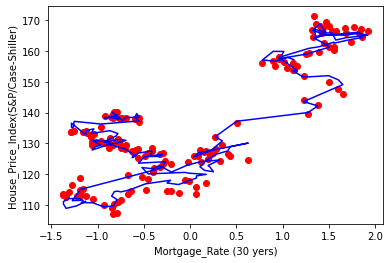

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.73
Accuracy: 98.67 %.


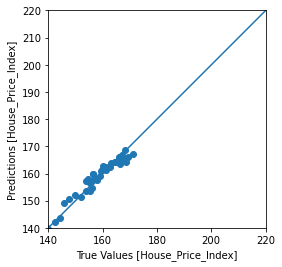

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9847931588978097

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,3.396855
1,-7.125547
2,3.163778
3,1.205750
4,11.653812
5,3.104703
6,6.963897
7,1.320784
8,6.012834
9,-4.179992


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[157.19813994 157.94110425 156.65781412 157.10910775 159.9018043
 159.8708296  157.52196563 159.00276408 161.28342761 162.50688876
 164.29577227 165.37258031 165.20332234 165.1622263  165.55586549
 165.67030618 165.12793511 164.34442901 163.57286581 165.91005762
 165.77933863 166.70052418 168.73634891 166.14534128 167.07873846
 164.28496963 165.07666124 166.10803032 164.38222736 163.75951762
 162.54395925 162.88359703 161.37956482 160.87554183 157.89601857
 154.71568587 153.52550248 153.57664446 151.51464905 151.9878171
 150.62832551 149.09008557 143.57159698 142.15224171 140.00851016
 137.17108432 132.14630281 130.79202794 127.6228399  125.55852184
 126.88044406 130.09404465 128.92362584 127.53349749 126.45216938
 124.49646117 122.37664218 121.22873158 120.77808562 122.37280408
 122.80677134 124.59218841 124.06462772 122.94956171 120.66536364
 122.6896245  121.74661438 122.13558652 120.07050443 120.56062964
 120.28981335 119.92379435 119.42053565 118.72726932 116.61001983
 117.1170667

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,157.198140
1,157.941104
2,156.657814
3,157.109108
4,159.901804
...,...
149,138.381691
150,138.212803
151,138.807962
152,138.567626


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,150,151,152,153
Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,1.446086,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
Personal_Income,-1.561462,-1.511829,-1.462196,-1.412562,-1.362929,-1.313296,-1.263663,-1.214030,-1.164397,-1.114764,...,1.703966,1.753602,1.803238,1.852874,1.902510,1.952146,2.001782,2.051419,2.101055,2.150691
Resident_Population,-2.823694,-2.752257,-2.680820,-2.609384,-2.537947,-2.466510,-2.395073,-2.323636,-2.252200,-2.180763,...,0.032621,-0.015870,-0.064360,-0.112851,-0.161341,-0.209832,-0.258322,-0.306813,-0.355304,-0.403794
Unemployment_Rate,-0.464771,-0.509534,-0.554296,-0.375247,-0.554296,-0.778107,-0.778107,-0.957156,-0.912394,-0.957156,...,-1.136205,-1.225729,-1.270491,-0.957156,-0.957156,-0.867631,-1.180967,-1.225729,-1.270491,-1.270491
GDP,-1.483057,-1.445181,-1.407305,-1.369429,-1.331553,-1.293677,-1.255802,-1.217926,-1.180050,-1.142174,...,1.625244,1.669145,1.713046,1.756947,1.800848,1.844749,1.888650,1.932551,1.976451,2.020352
Crime_Rate,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,...,0.381377,0.376453,0.371529,0.366605,0.361681,0.356756,0.351832,0.346908,0.341984,0.337059
Median_Debt,-0.119652,-0.071551,-0.023450,0.024650,0.045456,0.066262,0.087067,0.163637,0.240207,0.316777,...,-1.372096,-1.370922,-1.369748,-1.368574,-1.363226,-1.357878,-1.352530,-1.353084,-1.353639,-1.354193
New_Structures,2.273523,2.239534,2.265026,2.155335,2.498314,3.055269,2.480547,2.295153,2.133705,1.778366,...,-0.402335,0.761015,-0.374526,1.175062,-0.421647,0.076601,0.095912,0.161573,-0.144328,0.010168
Economic_Conditions_Index,0.326249,0.501062,0.189676,0.195139,0.501062,0.391804,0.342637,0.364489,0.419118,0.506525,...,0.337175,0.156899,0.189676,0.189676,0.195139,0.260694,0.386341,0.364489,0.440970,0.468284
CPI all items less shelter,-2.254473,-2.057069,-2.094670,-2.085270,-2.057069,-1.897266,-1.521259,-1.530659,-1.643461,-1.793864,...,0.962832,1.037470,1.016695,0.963584,1.050536,1.111731,1.176498,1.063602,1.119815,1.051852


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,144,145,146,147,148,149,150,151,152,153
0,Mortgage_Rate (30 yers),1.118462,1.051011,0.916107,0.781203,0.896835,1.012467,0.964287,1.253366,1.503902,...,-0.548563,-0.693103,-0.731647,-0.837642,-0.770190,-0.856914,-0.924366,-0.837642,-0.818370,-0.789462
1,Personal_Income,-1.561462,-1.511829,-1.462196,-1.412562,-1.362929,-1.313296,-1.263663,-1.214030,-1.164397,...,1.703966,1.753602,1.803238,1.852874,1.902510,1.952146,2.001782,2.051419,2.101055,2.150691
2,Resident_Population,-2.823694,-2.752257,-2.680820,-2.609384,-2.537947,-2.466510,-2.395073,-2.323636,-2.252200,...,0.032621,-0.015870,-0.064360,-0.112851,-0.161341,-0.209832,-0.258322,-0.306813,-0.355304,-0.403794
3,Unemployment_Rate,-0.464771,-0.509534,-0.554296,-0.375247,-0.554296,-0.778107,-0.778107,-0.957156,-0.912394,...,-1.136205,-1.225729,-1.270491,-0.957156,-0.957156,-0.867631,-1.180967,-1.225729,-1.270491,-1.270491
4,GDP,-1.483057,-1.445181,-1.407305,-1.369429,-1.331553,-1.293677,-1.255802,-1.217926,-1.180050,...,1.625244,1.669145,1.713046,1.756947,1.800848,1.844749,1.888650,1.932551,1.976451,2.020352
5,Crime_Rate,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,1.200613,...,0.381377,0.376453,0.371529,0.366605,0.361681,0.356756,0.351832,0.346908,0.341984,0.337059
6,Median_Debt,-0.119652,-0.071551,-0.023450,0.024650,0.045456,0.066262,0.087067,0.163637,0.240207,...,-1.372096,-1.370922,-1.369748,-1.368574,-1.363226,-1.357878,-1.352530,-1.353084,-1.353639,-1.354193
7,New_Structures,2.273523,2.239534,2.265026,2.155335,2.498314,3.055269,2.480547,2.295153,2.133705,...,-0.402335,0.761015,-0.374526,1.175062,-0.421647,0.076601,0.095912,0.161573,-0.144328,0.010168
8,Economic_Conditions_Index,0.326249,0.501062,0.189676,0.195139,0.501062,0.391804,0.342637,0.364489,0.419118,...,0.337175,0.156899,0.189676,0.189676,0.195139,0.260694,0.386341,0.364489,0.440970,0.468284
9,CPI all items less shelter,-2.254473,-2.057069,-2.094670,-2.085270,-2.057069,-1.897266,-1.521259,-1.530659,-1.643461,...,0.962832,1.037470,1.016695,0.963584,1.050536,1.111731,1.176498,1.063602,1.119815,1.051852


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),3.396855
1,Personal_Income,-7.125547
2,Resident_Population,3.163778
3,Unemployment_Rate,1.205750
4,GDP,11.653812
5,Crime_Rate,3.104703
6,Median_Debt,6.963897
7,New_Structures,1.320784
8,Economic_Conditions_Index,6.012834
9,CPI all items less shelter,-4.179992


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

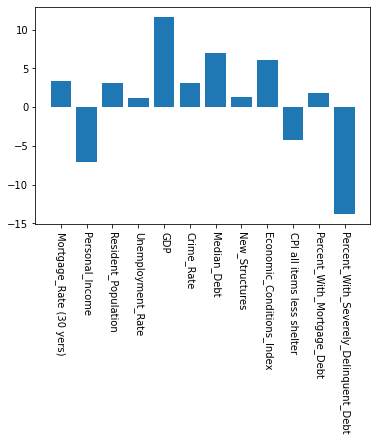

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2018,141.063547,4.03,61642.00000,9484.158000,5.0,691288.4170,1091.129167,35.67%,164696.6667,1.77%,671,1.96,211.957
1,2/1/2018,141.469333,4.33,61796.83333,9482.023083,4.8,692777.7163,1083.398333,35.83%,164572.3333,1.73%,864,1.99,211.617
2,3/1/2018,141.786227,4.44,61951.66667,9479.888167,4.1,694267.0155,1075.667500,36.00%,164448.0000,1.70%,1370,1.85,211.577
3,4/1/2018,141.763468,4.47,62106.50000,9477.753250,3.7,695756.3148,1067.936667,35.93%,164310.0000,1.63%,1767,1.21,213.099
4,5/1/2018,141.847600,4.59,62261.33333,9475.618333,3.5,697245.6140,1060.205833,35.87%,164172.0000,1.57%,2161,1.49,213.764
5,6/1/2018,141.817359,4.57,62416.16667,9473.483417,4.5,698734.9133,1052.475000,35.80%,164034.0000,1.50%,1688,1.61,212.952
6,7/1/2018,141.861185,4.53,62571.00000,9471.348500,4.3,700224.2125,1044.744167,35.80%,164357.0000,1.47%,1282,1.62,212.395
7,8/1/2018,142.383146,4.55,62725.83333,9469.213583,4.1,701713.5118,1037.013333,35.80%,164680.0000,1.43%,1615,1.51,212.840
8,9/1/2018,143.084706,4.63,62880.66667,9467.078667,3.7,703202.8110,1029.282500,35.80%,165003.0000,1.40%,1583,1.35,213.605
9,10/1/2018,143.920804,4.83,63035.50000,9464.943750,3.9,704692.1103,1021.551667,35.67%,165081.0000,1.40%,1736,1.35,213.241


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2018,141.063547,4.03,61642.00000,9484.158000,5.0,691288.4170,1091.129167,164696.6667,671,1.96,211.957,35.67,1.77
1,2/1/2018,141.469333,4.33,61796.83333,9482.023083,4.8,692777.7163,1083.398333,164572.3333,864,1.99,211.617,35.83,1.73
2,3/1/2018,141.786227,4.44,61951.66667,9479.888167,4.1,694267.0155,1075.667500,164448.0000,1370,1.85,211.577,36.00,1.70
3,4/1/2018,141.763468,4.47,62106.50000,9477.753250,3.7,695756.3148,1067.936667,164310.0000,1767,1.21,213.099,35.93,1.63
4,5/1/2018,141.847600,4.59,62261.33333,9475.618333,3.5,697245.6140,1060.205833,164172.0000,2161,1.49,213.764,35.87,1.57


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.03,61642.00000,9484.158000,5.0,691288.4170,1091.129167,164696.6667,671,1.96,211.957,35.67,1.77
1,4.33,61796.83333,9482.023083,4.8,692777.7163,1083.398333,164572.3333,864,1.99,211.617,35.83,1.73
2,4.44,61951.66667,9479.888167,4.1,694267.0155,1075.667500,164448.0000,1370,1.85,211.577,36.00,1.70
3,4.47,62106.50000,9477.753250,3.7,695756.3148,1067.936667,164310.0000,1767,1.21,213.099,35.93,1.63
4,4.59,62261.33333,9475.618333,3.5,697245.6140,1060.205833,164172.0000,2161,1.49,213.764,35.87,1.57
5,4.57,62416.16667,9473.483417,4.5,698734.9133,1052.475000,164034.0000,1688,1.61,212.952,35.80,1.50
6,4.53,62571.00000,9471.348500,4.3,700224.2125,1044.744167,164357.0000,1282,1.62,212.395,35.80,1.47
7,4.55,62725.83333,9469.213583,4.1,701713.5118,1037.013333,164680.0000,1615,1.51,212.840,35.80,1.43
8,4.63,62880.66667,9467.078667,3.7,703202.8110,1029.282500,165003.0000,1583,1.35,213.605,35.80,1.40
9,4.83,63035.50000,9464.943750,3.9,704692.1103,1021.551667,165081.0000,1736,1.35,213.241,35.67,1.40


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.540000,0.220289,4.030000,4.462500,4.560000,4.632500,4.870000
Personal_Income,12.0,62493.583333,558.259523,61642.000000,62067.791668,62493.583335,62919.375003,63345.166670
Resident_Population,12.0,9472.415958,7.697551,9460.673917,9466.544938,9472.415958,9478.286979,9484.158000
Unemployment_Rate,12.0,4.100000,0.474821,3.500000,3.700000,4.050000,4.350000,5.000000
GDP,12.0,699479.562900,5369.744814,691288.417000,695383.989975,699479.562900,703575.135825,707670.708800
Crime_Rate,12.0,1048.609583,27.873916,1006.090000,1027.349792,1048.609584,1069.869375,1091.129167
Median_Debt,12.0,164645.833333,401.487525,164034.000000,164345.250000,164626.166650,165022.500000,165237.000000
New_Structures,12.0,1484.333333,449.625770,671.000000,1227.500000,1599.000000,1743.750000,2161.000000
Economic_Conditions_Index,12.0,1.560000,0.255129,1.210000,1.350000,1.500000,1.677500,1.990000
CPI all items less shelter,12.0,212.333917,1.142682,209.956000,211.607000,212.617500,213.134500,213.764000


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.712375,2.200327,-0.452285,-1.001918,2.064253,0.268053,-1.366357,-0.783938,0.479210,1.200751,-1.775540,-1.050844
1,-0.423295,2.228181,-0.493756,-1.091442,2.088279,0.199047,-1.378521,-0.634850,0.495599,1.168790,-1.723663,-1.069759
2,-0.317299,2.256034,-0.535228,-1.404778,2.112305,0.130041,-1.390684,-0.243977,0.419118,1.165030,-1.668543,-1.083946
3,-0.288391,2.283888,-0.576699,-1.583827,2.136331,0.061035,-1.404185,0.062696,0.069492,1.308101,-1.691239,-1.117047
4,-0.172759,2.311742,-0.618171,-1.673351,2.160357,-0.007971,-1.417686,0.367052,0.222454,1.370612,-1.710693,-1.145420
5,-0.192031,2.339596,-0.659642,-1.225729,2.184383,-0.076977,-1.431187,0.001670,0.288008,1.294282,-1.733390,-1.178522
6,-0.230575,2.367449,-0.701114,-1.315254,2.208409,-0.145983,-1.399587,-0.311955,0.293471,1.241923,-1.733390,-1.192709
7,-0.211303,2.395303,-0.742585,-1.404778,2.232435,-0.214989,-1.367987,-0.054720,0.233379,1.283754,-1.733390,-1.211624
8,-0.134215,2.423157,-0.784057,-1.583827,2.256461,-0.283995,-1.336388,-0.079440,0.145973,1.355666,-1.733390,-1.225811
9,0.058504,2.451011,-0.825528,-1.494302,2.280487,-0.353001,-1.328757,0.038749,0.145973,1.321449,-1.775540,-1.225811


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[138.22618356 139.53519847 139.53588924 137.18233059 138.52733843
 139.29159208 139.04258869 139.02149909 138.36106183 139.13650667
 140.26862543 138.56252131]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,138.226184
1,139.535198
2,139.535889
3,137.182331
4,138.527338
5,139.291592
6,139.042589
7,139.021499
8,138.361062
9,139.136507
